# Самостоятельный проект

**Описание проекта**

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.

**Задача проекта:** разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

**Подход к решению задачи:**
1. Нужно построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца.
2. В исследование нужно включить дополнительные данные финансового департамента о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца.
3. Используя данные модели и данные о прибыльности клиентов, нужно выделить сегменты покупателей и разработать для них персонализированные предложения

**Описание данных:**

`market_file.csv` - Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.

* id — номер покупателя в корпоративной базе данных.
* Покупательская активность — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
* Тип сервиса — уровень сервиса, например «премиум» и «стандарт».
* Разрешить сообщать — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
* Маркет_актив_6_мес — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
* Маркет_актив_тек_мес — количество маркетинговых коммуникаций в текущем месяце.
* Длительность — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
* Акционные_покупки — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
* Популярная_категория — самая популярная категория товаров у покупателя за последние 6 месяцев.
* Средний_просмотр_категорий_за_визит — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
* Неоплаченные_продукты_штук_квартал — общее число неоплаченных товаров в корзине за последние 3 месяца.
* Ошибка_сервиса — число сбоев, которые коснулись покупателя во время посещения сайта.
* Страниц_за_визит — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

`market_money.csv` - Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.

* id — номер покупателя в корпоративной базе данных.
* Период — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
* Выручка — сумма выручки за период.

`market_time.csv` - Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.

* id — номер покупателя в корпоративной базе данных.
* Период — название периода, во время которого зафиксировано общее время.
* минут — значение времени, проведённого на сайте, в минутах.

`money.csv` - Таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.

* id — номер покупателя в корпоративной базе данных.
* Прибыль — значение прибыли.

**План работы:**
1. Загрузка данных.
2. Предобработка данных.
3. Исследовательский анализ данных.
4. Объединение таблиц.
5. Корреляционный анализ.
6. Использование пайплайнов.
7. Анализ важности признаков.
8. Сегментация покупателей.
9. Общий вывод.

## Загрузка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import math
import numpy as np
import phik
import shap

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [2]:
market_file = pd.read_csv(r'~/market_file.csv')
market_money = pd.read_csv(r'~/market_money.csv')
market_time = pd.read_csv(r'~/market_time.csv')
money = pd.read_csv(r'~/money.csv', sep=';', decimal=",")

In [3]:
market_file.head(10)

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2
5,215353,Снизилась,стандартт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4
6,215354,Снизилась,стандартт,да,5.1,3,431,0.23,Косметика и аксесуары,2,3,7,2
7,215355,Снизилась,стандартт,нет,4.7,4,284,0.17,Товары для детей,5,1,6,4
8,215356,Снизилась,стандартт,да,4.2,4,192,0.14,Косметика и аксесуары,2,2,1,3
9,215357,Снизилась,стандартт,да,3.9,5,154,0.00,Техника для красоты и здоровья,3,3,9,5


In [4]:
market_file.info()
display(market_file.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

,id,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.00000,1300.000000,1300.000000,1300.000000
mean,215997.500000,4.253769,4.011538,601.898462,0.319808,3.27000,2.840000,4.185385,8.176923
std,375.421985,1.014814,0.696868,249.856289,0.249843,1.35535,1.971451,1.955298,3.978126
min,215348.000000,0.900000,3.000000,110.000000,0.000000,1.00000,0.000000,0.000000,1.000000
25%,215672.750000,3.700000,4.000000,405.500000,0.170000,2.00000,1.000000,3.000000,5.000000
50%,215997.500000,4.200000,4.000000,606.000000,0.240000,3.00000,3.000000,4.000000,8.000000
75%,216322.250000,4.900000,4.000000,806.000000,0.300000,4.00000,4.000000,6.000000,11.000000
max,216647.000000,6.600000,5.000000,1079.000000,0.990000,6.00000,10.000000,9.000000,20.000000


Названия столбцов соответствует описанию. Нужно будет привести к змеиному регистру и удалить пробелы. Явных пропусков не замечено. 

In [5]:
market_money.head(10)

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6
5,215349,предыдущий_месяц,5216.0
6,215350,препредыдущий_месяц,4826.0
7,215350,текущий_месяц,5058.4
8,215350,предыдущий_месяц,5457.5
9,215351,текущий_месяц,6610.4


In [6]:
market_money.info()
display(market_money.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


,id,Выручка
count,3900.000000,3900.000000
mean,215997.500000,5025.696051
std,375.325686,1777.704104
min,215348.000000,0.000000
25%,215672.750000,4590.150000
50%,215997.500000,4957.500000
75%,216322.250000,5363.000000
max,216647.000000,106862.200000


Столбцы датасета совпадают с описанием. Явных пропусков не видно. Нужно привести к змеиному регистру. Есть записи с выручной 0 и с выручкой 106862, хотя 3 квартиль равен всего лишь 5363. Выглядят подозрительно.

In [7]:
market_time.head(10)

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13
5,215350,предыдцщий_месяц,8
6,215351,текущий_месяц,13
7,215351,предыдцщий_месяц,11
8,215352,текущий_месяц,11
9,215352,предыдцщий_месяц,8


In [8]:
market_time.info()
display(market_time.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


,id,минут
count,2600.000000,2600.000000
mean,215997.500000,13.336154
std,375.349754,4.080198
min,215348.000000,4.000000
25%,215672.750000,10.000000
50%,215997.500000,13.000000
75%,216322.250000,16.000000
max,216647.000000,23.000000


Столбцы датасета совпадают с описанием. Явных пропусков не видно. Нужно привести к змеиному регистру.

In [9]:
money.head(10)

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21
5,215353,3.95
6,215354,3.62
7,215355,5.26
8,215356,4.93
9,215357,4.66


In [10]:
money.info()
display(money.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


,id,Прибыль
count,1300.000000,1300.000000
mean,215997.500000,3.996631
std,375.421985,1.013722
min,215348.000000,0.860000
25%,215672.750000,3.300000
50%,215997.500000,4.045000
75%,216322.250000,4.670000
max,216647.000000,7.430000


Столбцы датасета совпадают с описанием. Явных пропусков не видно. Нужно привести к змеиному регистру.

**Вывод:**
все столбцы датасета соответствуют описанию. Нужно будет привести к змеиному регистру и изменить тип данных у некоторых столбцов.

## Предобработка данных

Нужно привести к змеиному регистру названия столбцов, изменить тип данных некоторых столбцов, проверить на наличие пропусков и  неявных дубликатов.

**1. Переименование стобцов**

In [11]:
def low_str(df):
     df.columns = df.columns.str.replace(' ', '_').str.lower()

In [12]:
low_str(market_file)
low_str(market_money)
low_str(market_time)
low_str(money)

In [13]:
market_file.columns

Index(['id', 'покупательская_активность', 'тип_сервиса', 'разрешить_сообщать',
       'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность',
       'акционные_покупки', 'популярная_категория',
       'средний_просмотр_категорий_за_визит',
       'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
       'страниц_за_визит'],
      dtype='object')

In [14]:
market_money.columns

Index(['id', 'период', 'выручка'], dtype='object')

In [15]:
market_time.columns

Index(['id', 'период', 'минут'], dtype='object')

In [16]:
money.columns

Index(['id', 'прибыль'], dtype='object')

**2. Изменение типов данных**

In [17]:
#money['прибыль'] = money['прибыль'].str.replace(',', '.')
#money['прибыль'] = money['прибыль'].astype('float64')

**3. Обработка дубликатов**

In [18]:
print('Количество дубликатов в market_file: ', market_file.duplicated().sum())
print('Количество дубликатов в market_money: ', market_money.duplicated().sum())
print('Количество дубликатов в market_time: ', market_time.duplicated().sum())
print('Количество дубликатов в money: ', money.duplicated().sum())

Количество дубликатов в market_file:  0
Количество дубликатов в market_money:  0
Количество дубликатов в market_time:  0
Количество дубликатов в money:  0


Полных дубликатов нет. 

In [19]:
market_file[market_file.duplicated(subset=['покупательская_активность', 'тип_сервиса', 'разрешить_сообщать',
       'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность',
       'акционные_покупки', 'популярная_категория',
       'ошибка_сервиса',
       'страниц_за_визит'])]

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
547,215895,Снизилась,стандарт,нет,4.4,5,517,0.23,Товары для детей,1,2,5,11
548,215896,Снизилась,стандарт,нет,4.3,4,460,0.16,Техника для красоты и здоровья,2,1,3,6
549,215897,Снизилась,стандарт,да,3.9,4,627,0.24,Товары для детей,3,3,7,8
550,215898,Снизилась,стандарт,да,5.5,4,703,0.14,Мелкая бытовая техника и электроника,2,1,3,7
551,215899,Снизилась,стандарт,нет,5.0,4,136,0.27,Товары для детей,3,4,4,17
552,215900,Снизилась,стандарт,да,4.8,4,907,0.30,Косметика и аксесуары,2,1,1,6
553,215901,Снизилась,стандарт,нет,3.9,5,600,0.17,Домашний текстиль,1,7,4,10
554,215902,Снизилась,стандарт,да,3.3,3,871,0.20,Техника для красоты и здоровья,2,4,2,17
555,215903,Снизилась,стандарт,да,5.6,5,574,0.28,Домашний текстиль,3,2,3,9
556,215904,Снизилась,премиум,да,5.5,5,982,0.94,Мелкая бытовая техника и электроника,3,1,8,10


Без id присутствуют 11 дубликатов. Пока не будем трогать, так как датасет не такой большой.

Поищем неявные дубликаты

In [20]:
market_file['популярная_категория'].unique()

array(['Товары для детей', 'Домашний текстиль', 'Косметика и аксесуары',
       'Техника для красоты и здоровья', 'Кухонная посуда',
       'Мелкая бытовая техника и электроника'], dtype=object)

In [21]:
market_time['период'].unique()

array(['текущий_месяц', 'предыдцщий_месяц'], dtype=object)

In [22]:
market_money['период'].unique()

array(['препредыдущий_месяц', 'текущий_месяц', 'предыдущий_месяц'],
      dtype=object)

Здесь все хорошо

**Обработка пропусков**

In [23]:
market_file.isna().sum()

id                                     0
покупательская_активность              0
тип_сервиса                            0
разрешить_сообщать                     0
маркет_актив_6_мес                     0
маркет_актив_тек_мес                   0
длительность                           0
акционные_покупки                      0
популярная_категория                   0
средний_просмотр_категорий_за_визит    0
неоплаченные_продукты_штук_квартал     0
ошибка_сервиса                         0
страниц_за_визит                       0
dtype: int64

In [24]:
market_time.isna().sum()

id        0
период    0
минут     0
dtype: int64

In [25]:
market_money.isna().sum()

id         0
период     0
выручка    0
dtype: int64

In [26]:
money.isna().sum()

id         0
прибыль    0
dtype: int64

Пропусков в данных не замечено.

**Вывод**: мы привели навзания столбцов к змеиному регистру, изменили тип данных, проверили на наличие дубликатов и пропусков. 

## Исследовательский анализ данных

Построим функции для построения графиков

In [27]:
def cat_plot(df, column):
    display(df[column].unique())
    plt.figure(figsize=(9,7))
    sns.countplot(y=column, data=df)
    plt.title(f'Рапределение по {column}', fontsize=16)
    plt.xlabel('Количество', fontsize=14)

In [28]:
def hist_box_plot(df, column, target):
    sns.set()
    f, axes = plt.subplots(1, 2, figsize=(16, 4))
    axes[0].set_title(f'Гистограмма для {column}', fontsize=16)
    axes[0].set_ylabel('Количество', fontsize=14)
    if target != None:
        sns.histplot(df, bins=20, kde=True, ax=axes[0], hue=target, x=column)
    else:
        sns.histplot(df, bins=20, kde=True, ax=axes[0], x=column)
    axes[1].set_title(f'График ящик с усами для {column}', fontsize=16)
    sns.boxplot(data=df, ax=axes[1], y=column)
    axes[1].set_ylabel(column, fontsize=14)
    plt.show()

In [29]:
def bar_plot(df, column):
    plt.figure(figsize=(8,6))
    sns.barplot(x=column, data=df, y=df.index)
    plt.title(f'Рапределение по {column}', fontsize=16)
    plt.xlabel('Количество', fontsize=14)

array(['Снизилась', 'Прежний уровень'], dtype=object)

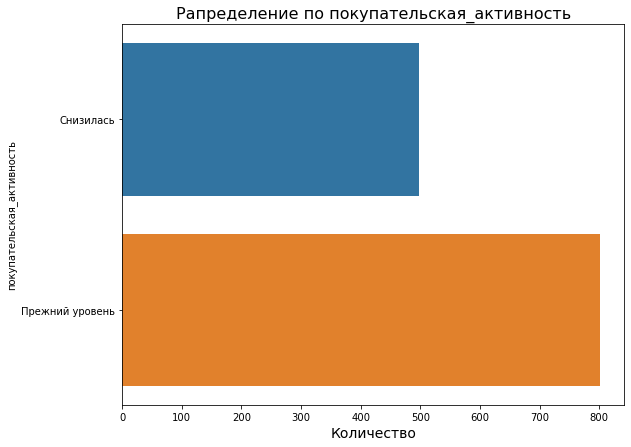

In [30]:
cat_plot(market_file, 'покупательская_активность')

Видим дисбаланс. Нужно будет учесть при построении модели. 

array(['премиум', 'стандартт', 'стандарт'], dtype=object)

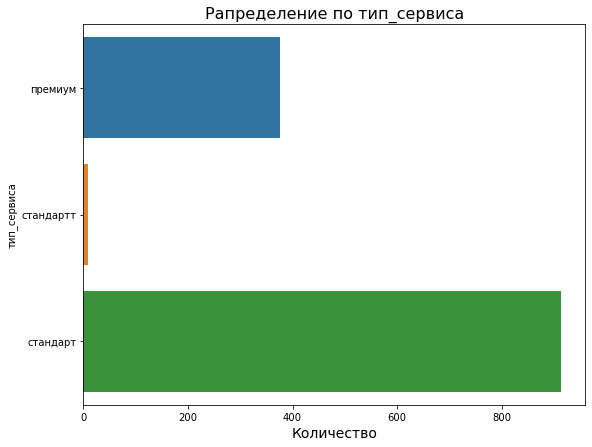

In [31]:
cat_plot(market_file, 'тип_сервиса')

Мы обнаружили неявный дубликат, который необходимо обработать. Также виден сильный дисбаланс.

In [32]:
market_file['тип_сервиса'] = market_file['тип_сервиса'].replace('стандартт', 'стандарт')

array(['премиум', 'стандарт'], dtype=object)

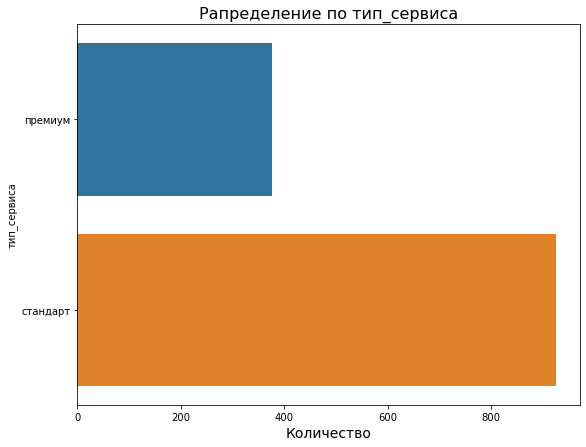

In [33]:
cat_plot(market_file, 'тип_сервиса')

array(['да', 'нет'], dtype=object)

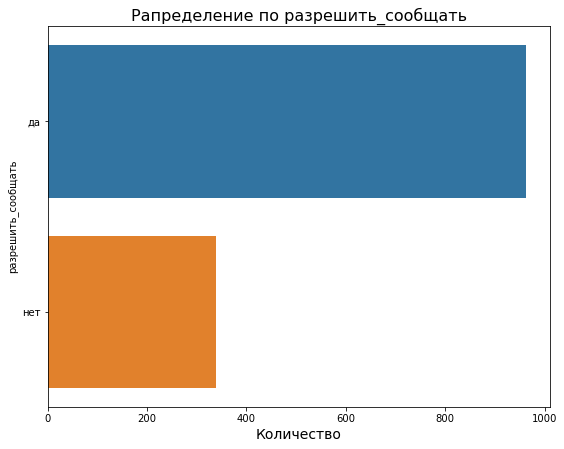

In [34]:
cat_plot(market_file, 'разрешить_сообщать')

Снова дисбаланс.

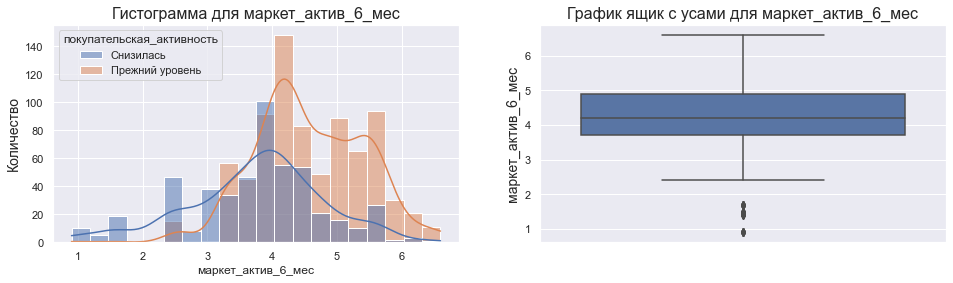

In [35]:
hist_box_plot(market_file, 'маркет_актив_6_мес', 'покупательская_активность')

Как видно, графики "Снизилась" и "Прежний уровень" похожи формами. При этом, "Снизилась" имеет несколько выбросов. В целом, все выглядит нормально. 

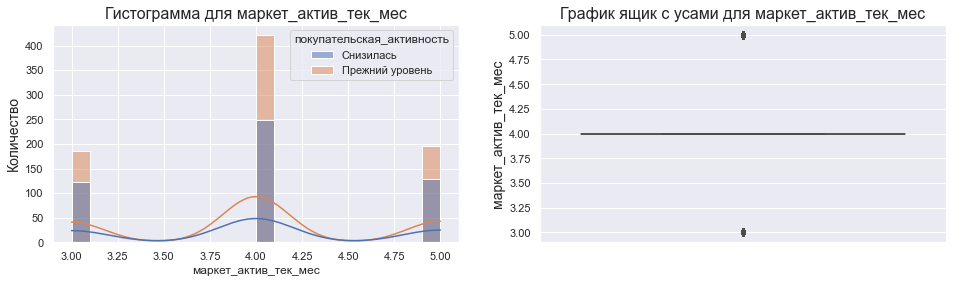

In [36]:
hist_box_plot(market_file, 'маркет_актив_тек_мес', 'покупательская_активность')

График выглядит интересно, но мало что понятно. 

In [37]:
market_file[market_file['маркет_актив_тек_мес'] >=5]

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
9,215357,Снизилась,стандарт,да,3.9,5,154,0.00,Техника для красоты и здоровья,3,3,9,5
11,215359,Снизилась,стандарт,да,4.6,5,110,0.00,Домашний текстиль,4,2,4,2
20,215368,Снизилась,премиум,да,3.8,5,829,0.24,Техника для красоты и здоровья,2,2,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1273,216621,Прежний уровень,стандарт,нет,6.6,5,612,0.25,Товары для детей,5,0,8,5
1276,216624,Прежний уровень,стандарт,да,5.4,5,806,0.17,Домашний текстиль,6,1,8,11
1277,216625,Прежний уровень,стандарт,да,3.4,5,351,0.24,Кухонная посуда,5,1,6,8
1298,216646,Прежний уровень,стандарт,да,6.3,5,645,0.12,Техника для красоты и здоровья,3,3,5,7


In [38]:
market_file[market_file['маркет_актив_тек_мес'] ==3]

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2
6,215354,Снизилась,стандарт,да,5.1,3,431,0.23,Косметика и аксесуары,2,3,7,2
12,215360,Снизилась,премиум,да,3.9,3,623,0.35,Кухонная посуда,3,1,4,7
18,215366,Снизилась,стандарт,нет,3.8,3,209,0.22,Товары для детей,5,3,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1289,216637,Прежний уровень,стандарт,да,3.5,3,801,0.22,Техника для красоты и здоровья,5,1,4,6
1290,216638,Прежний уровень,стандарт,нет,1.5,3,930,0.29,Мелкая бытовая техника и электроника,2,0,4,16
1294,216642,Прежний уровень,премиум,да,4.2,3,991,0.40,Мелкая бытовая техника и электроника,4,3,5,12
1295,216643,Прежний уровень,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11


Исходя из анализа, это все-таки не выбросы. Возможно, у компании уставновлено определенное число операций (?) на количество маркетинговых коммуникаций в текущем месяце. Это объясняет такие точные числа и необычные графики. 

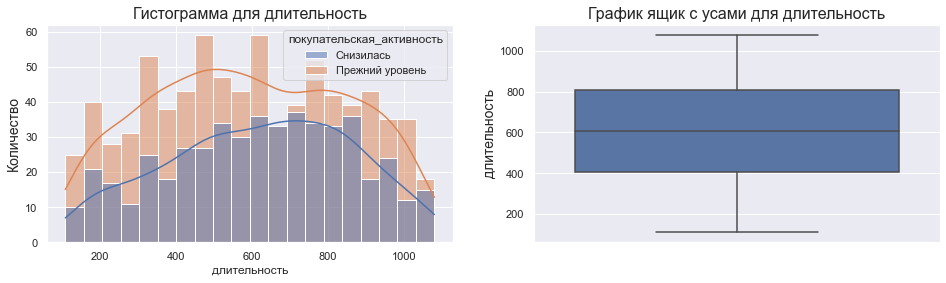

In [39]:
hist_box_plot(market_file, 'длительность', 'покупательская_активность')

Здесь, кажется, все нормально. Судя по графику, должна была образоваться опеределенная клиентская база из тех пользователей, которые уже давно пользуются услугами магазина. 

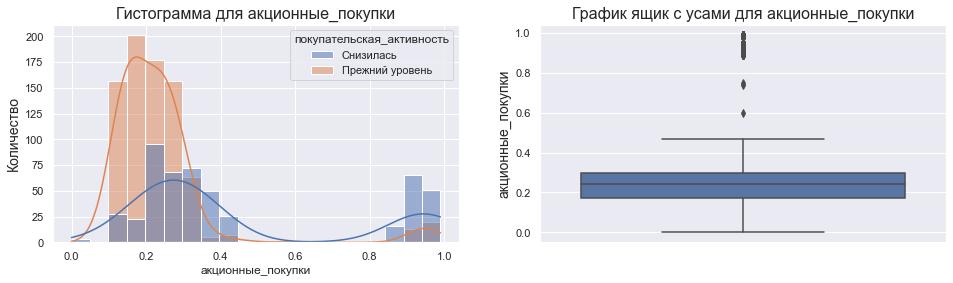

In [40]:
hist_box_plot(market_file, 'акционные_покупки', 'покупательская_активность')

Анализ данных показывает, что существенная часть клиентов активно отслеживает акции. 

Чтобы учесть этот фактор при обучении модели, можно разделить пользователей на две группы: "Часто покупает по акции" и "Редко покупает по акции". Это позволит преобразовать колонку "Акционные_покупки" в категориальный признак, что, вероятно, повысит точность модели.

array(['Товары для детей', 'Домашний текстиль', 'Косметика и аксесуары',
       'Техника для красоты и здоровья', 'Кухонная посуда',
       'Мелкая бытовая техника и электроника'], dtype=object)

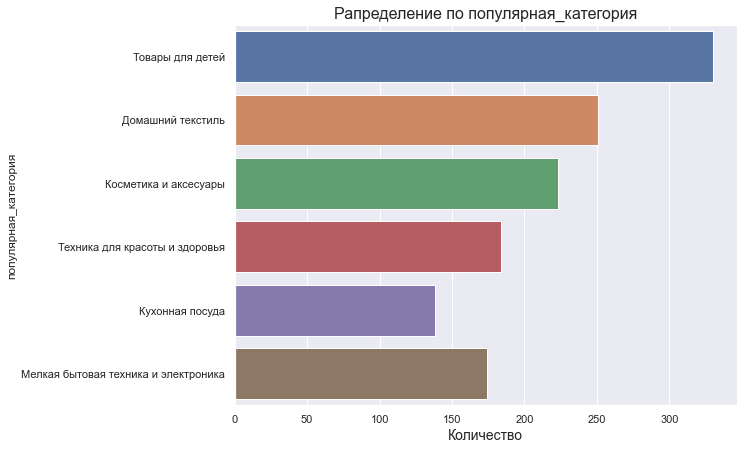

In [41]:
cat_plot(market_file, 'популярная_категория')

Из графика видно, что многие пользователи ориентируются на Товары для детей, Домашний текстиль, Косметика и аксессуары.

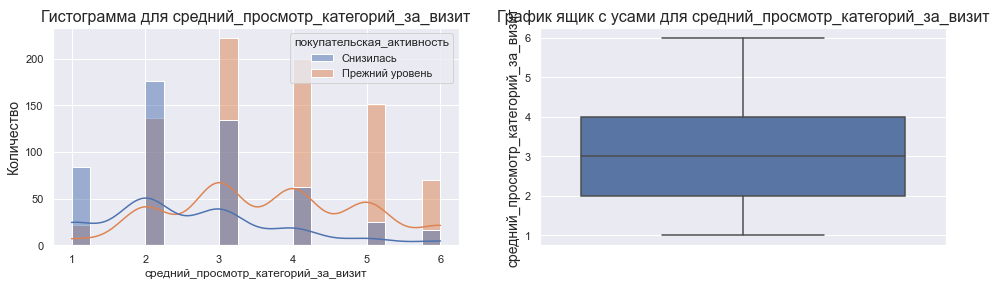

In [42]:
hist_box_plot(market_file, 'средний_просмотр_категорий_за_визит', 'покупательская_активность')

Средний просмотр категорий за визит составляет 2-4 раза.

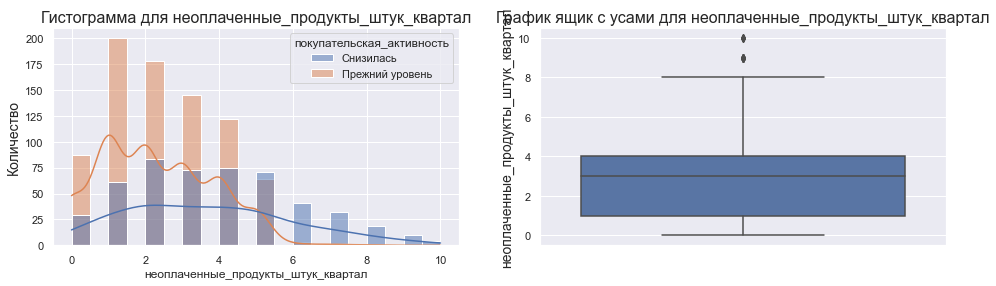

In [43]:
hist_box_plot(market_file, 'неоплаченные_продукты_штук_квартал', 'покупательская_активность')

Общее число неоплаченных товаров в корзине за последние 3 месяца составляет 1-3 товара. У большинства осталось это число прежним. 

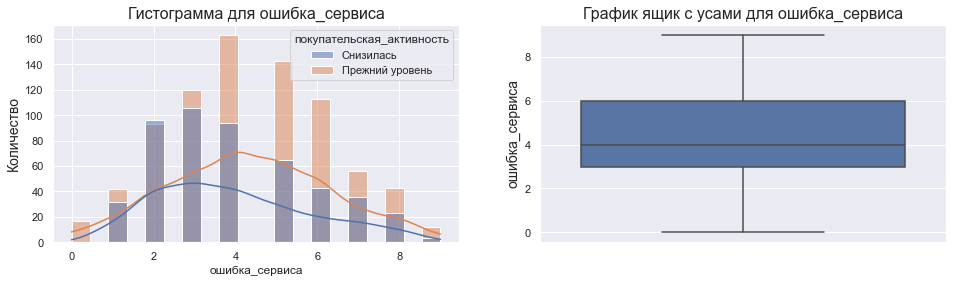

In [44]:
hist_box_plot(market_file, 'ошибка_сервиса', 'покупательская_активность')

Сайт падает примерно 4 раза за одно посещение. Возможно, стоит обратить внимание на эту проблему.

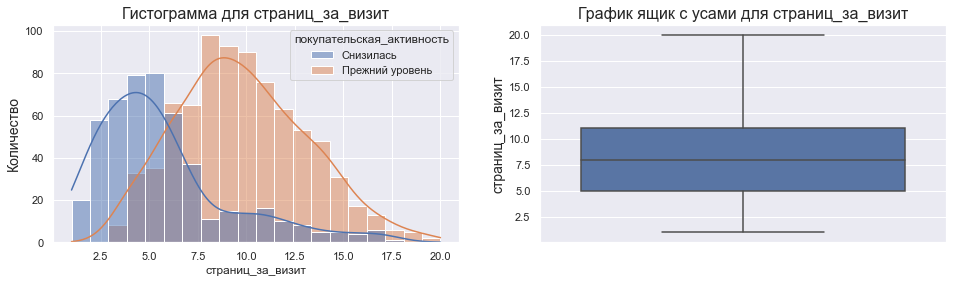

In [45]:
hist_box_plot(market_file, 'страниц_за_визит', 'покупательская_активность')

Как видно из графика, посещают около 10-12 страниц.

Теперь рассмотрим датасет **market_money**

array(['препредыдущий_месяц', 'текущий_месяц', 'предыдущий_месяц'],
      dtype=object)

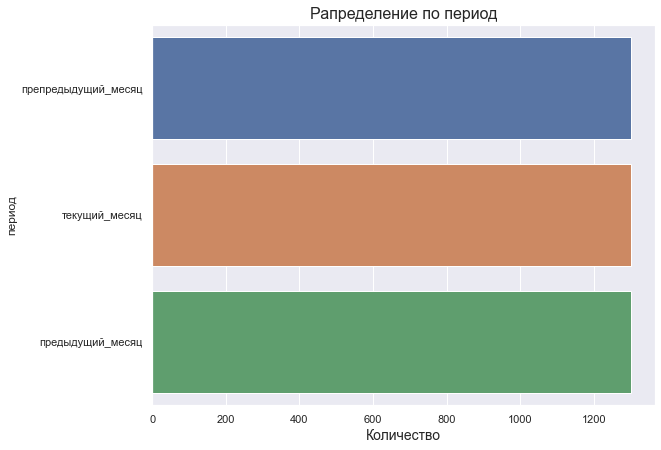

In [46]:
cat_plot(market_money, 'период')

Все выглядит стаблильно.

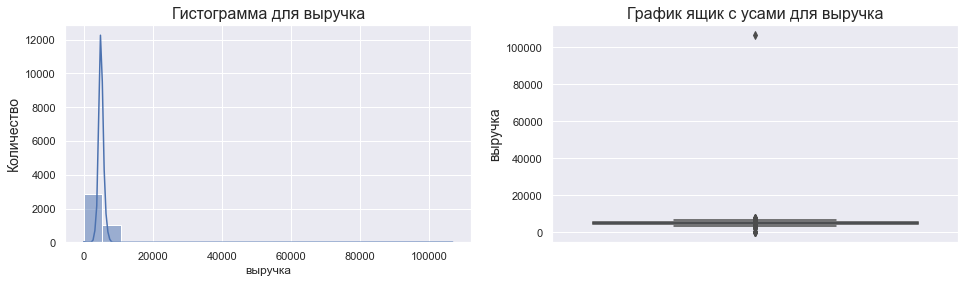

In [47]:
hist_box_plot(market_money, 'выручка', None)

Скорее всего, это выброс

In [48]:
market_money.query('выручка > 100000')

,id,период,выручка
98,215380,текущий_месяц,106862.2


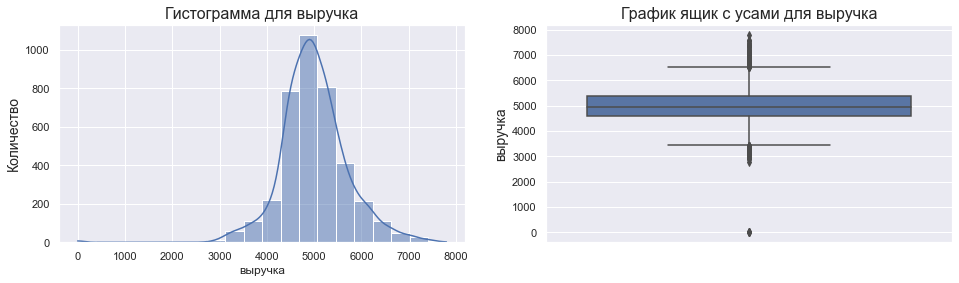

In [49]:
market_money = market_money[market_money['выручка'] < 100000]
hist_box_plot(market_money, 'выручка', None)

In [50]:
market_money.query('выручка < 1')

,id,период,выручка
0,215348,препредыдущий_месяц,0.0
2,215348,предыдущий_месяц,0.0
28,215357,препредыдущий_месяц,0.0
29,215357,предыдущий_месяц,0.0
34,215359,предыдущий_месяц,0.0
35,215359,препредыдущий_месяц,0.0


Нужно избавится от записей, где нет выручки, так как мы хотим в дальнейшем использовать только тех пользователей, у которых есть активность за каждый из трех месяцев.

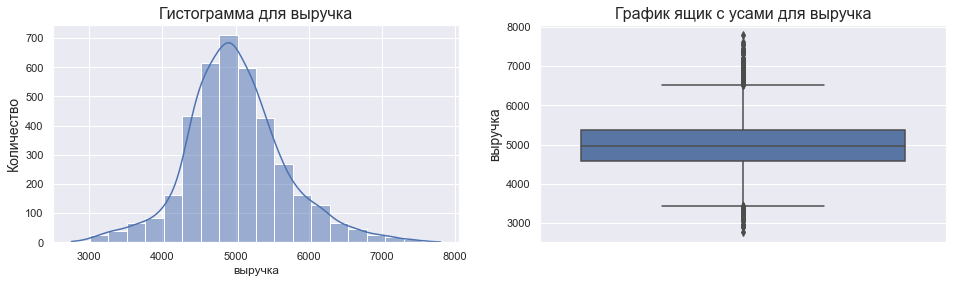

In [51]:
market_money = market_money[market_money['выручка'] > 0]
hist_box_plot(market_money, 'выручка', None)

Распределение выглядит нормально.

Рассмотрим **market_time**

In [52]:
market_table = market_time.pivot_table(index='период', values=['минут'], aggfunc='sum')

In [53]:
market_table.head(10)

,минут
период,
предыдцщий_месяц,17508
текущий_месяц,17166


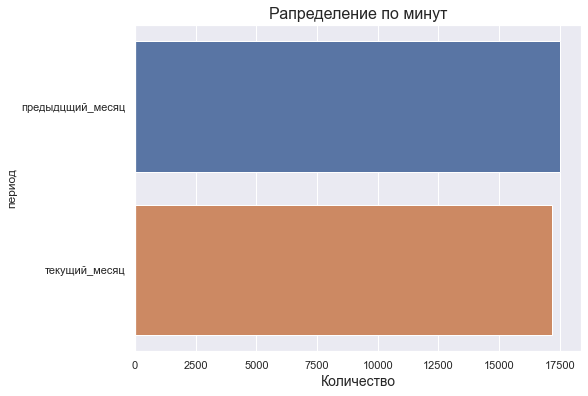

In [54]:
bar_plot(market_table, 'минут')

Мы обнаружили опечатку. Нужно исправить.

In [55]:
market_time['период'] = market_time['период'].replace('предыдцщий_месяц', 'предыдущий_месяц')

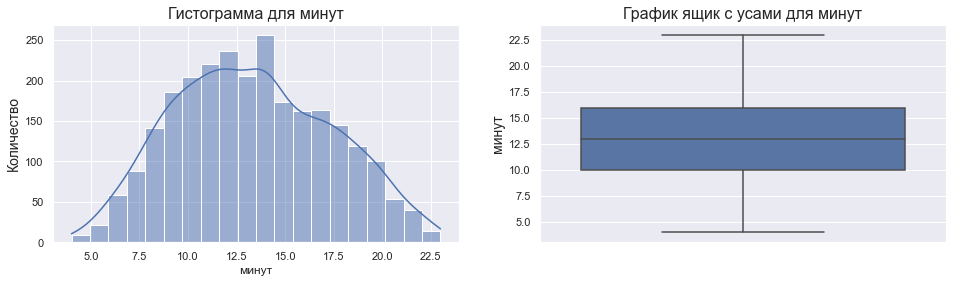

In [56]:
hist_box_plot(market_time, 'минут', None)

Пользователи проводят около 13-15 минут на сайте.

Рассмотрим далее **money**

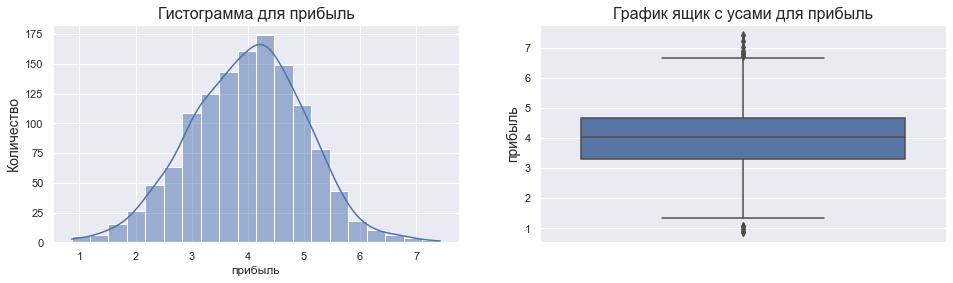

In [57]:
hist_box_plot(money, 'прибыль', None)

Распределение выглядит нормально. 

Далее нам нужно отобрать пользователей с активностью не менее трех месяцов.

In [58]:
period_counts = market_money.groupby('id')['период'].count()
filtered_ids = period_counts[period_counts == 3].index
filtered_market_file = market_file[market_file['id'].isin(filtered_ids)]
print(len(filtered_market_file))

1296


**Вывод:** 
* Большинство пользователей имеют уровень сервиса «Стандарт».
* Заинтересовано в уведомлении о предложении товаров.
* Покупательская активность имеет неплохой уровень, имеется клиентская база.
* Существенная часть отслеживает скидки.
* Многие из пользователей заинтересованы товарами и для детей, домашним текстилем, косметикой и аксессуарами.
* Часто падает сайт. Это определенно является проблемой для пользователей.
* Пользователи в среднем тратят около минуты на посмотр страницы.

Мы провели исследовательский анализ данных: построили графики, проанализировали их, нашли и избавились от аномалий, исправили опечатки. В конце отобрали пользователей с активностью не менее трех месяцев для дальнейшей работы.


## Объединение таблиц

In [59]:
market_money_pivot = market_money.pivot_table(index=['id'], columns=["период"])
market_money_pivot.columns = ['выручка_предыдущий_месяц', 'выручка_препредыдущий_месяц', 'выручка_текущий_месяц']
market_money_pivot['id'] = market_money_pivot.index
market_money_pivot.head(15)

,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,id
id,,,,
215348,NaN,NaN,3293.1,215348
215349,5216.0,4472.0,4971.6,215349
215350,5457.5,4826.0,5058.4,215350
215351,6158.0,4793.0,6610.4,215351
215352,5807.5,4594.0,5872.5,215352
215353,4738.5,5124.0,5388.5,215353
215354,5685.0,4503.0,5869.6,215354
215355,3263.0,4749.0,3772.6,215355
215356,4146.5,4433.0,4566.4,215356


In [60]:
market_money_pivot.isna().sum()

выручка_предыдущий_месяц       3
выручка_препредыдущий_месяц    3
выручка_текущий_месяц          1
id                             0
dtype: int64

In [61]:
market_time_pivot = market_time.pivot_table(index=['id'], columns=['период'])
market_time_pivot.columns = ['минут_предыдущий_месяц', 'минут_текущий_месяц']
market_time_pivot['id'] = market_time_pivot.index
display(market_time_pivot)
market_time_pivot.isna().sum()

,минут_предыдущий_месяц,минут_текущий_месяц,id
id,,,
215348,13,14,215348
215349,12,10,215349
215350,8,13,215350
215351,11,13,215351
215352,8,11,215352
...,...,...,...
216643,14,7,216643
216644,12,11,216644
216645,12,18,216645


минут_предыдущий_месяц    0
минут_текущий_месяц       0
id                        0
dtype: int64

In [62]:
market_full = market_file.join(market_money_pivot, on='id', how='inner', lsuffix="_left", rsuffix="_выручка")
#market_full = market_full.rename(columns={'id_left':'id'})
market_full = market_full.join(market_time_pivot, on='id', how='inner', lsuffix="_left", rsuffix="_минут")
#market_full = market_full.rename(columns={'id_left':'id'})
market_full = market_full.drop(['id_выручка', 'id_минут', 'id_left', 'id_left'], axis=1)
market_full.isna().sum()

C:\Users\Пользователь\AppData\Local\Temp\ipykernel_9060\3471817475.py:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'id_left'} in the result is deprecated and will raise a MergeError in a future version.
  market_full = market_full.join(market_time_pivot, on='id', how='inner', lsuffix="_left", rsuffix="_минут")


id                                     0
покупательская_активность              0
тип_сервиса                            0
разрешить_сообщать                     0
маркет_актив_6_мес                     0
маркет_актив_тек_мес                   0
длительность                           0
акционные_покупки                      0
популярная_категория                   0
средний_просмотр_категорий_за_визит    0
неоплаченные_продукты_штук_квартал     0
ошибка_сервиса                         0
страниц_за_визит                       0
выручка_предыдущий_месяц               3
выручка_препредыдущий_месяц            3
выручка_текущий_месяц                  1
минут_предыдущий_месяц                 0
минут_текущий_месяц                    0
dtype: int64

In [63]:
market_full.head(10)

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5,NaN,NaN,3293.1,13,14
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11
5,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10
6,215354,Снизилась,стандарт,да,5.1,3,431,0.23,Косметика и аксесуары,2,3,7,2,5685.0,4503.0,5869.6,11,12
7,215355,Снизилась,стандарт,нет,4.7,4,284,0.17,Товары для детей,5,1,6,4,3263.0,4749.0,3772.6,12,10
8,215356,Снизилась,стандарт,да,4.2,4,192,0.14,Косметика и аксесуары,2,2,1,3,4146.5,4433.0,4566.4,6,7
9,215357,Снизилась,стандарт,да,3.9,5,154,0.00,Техника для красоты и здоровья,3,3,9,5,NaN,NaN,5986.3,12,6


In [64]:
market_full.dropna(inplace=True)
market_full.isna().sum()

id                                     0
покупательская_активность              0
тип_сервиса                            0
разрешить_сообщать                     0
маркет_актив_6_мес                     0
маркет_актив_тек_мес                   0
длительность                           0
акционные_покупки                      0
популярная_категория                   0
средний_просмотр_категорий_за_визит    0
неоплаченные_продукты_штук_квартал     0
ошибка_сервиса                         0
страниц_за_визит                       0
выручка_предыдущий_месяц               0
выручка_препредыдущий_месяц            0
выручка_текущий_месяц                  0
минут_предыдущий_месяц                 0
минут_текущий_месяц                    0
dtype: int64

In [65]:
market_full.head(10)

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11
5,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10
6,215354,Снизилась,стандарт,да,5.1,3,431,0.23,Косметика и аксесуары,2,3,7,2,5685.0,4503.0,5869.6,11,12
7,215355,Снизилась,стандарт,нет,4.7,4,284,0.17,Товары для детей,5,1,6,4,3263.0,4749.0,3772.6,12,10
8,215356,Снизилась,стандарт,да,4.2,4,192,0.14,Косметика и аксесуары,2,2,1,3,4146.5,4433.0,4566.4,6,7
10,215358,Снизилась,стандарт,да,4.7,4,450,0.13,Домашний текстиль,4,2,6,4,3488.0,4727.0,4209.5,14,10
12,215360,Снизилась,премиум,да,3.9,3,623,0.35,Кухонная посуда,3,1,4,7,5304.5,5555.0,5834.9,9,6


**вывод:** мы объединили датасеты market_file.csv, market_money.csv, market_time.csv. 

## Корреляционный анализ

Посмотрим на матрицу корреляции

interval columns not set, guessing: ['маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 'акционные_покупки', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит', 'выручка_предыдущий_месяц', 'выручка_препредыдущий_месяц', 'выручка_текущий_месяц', 'минут_предыдущий_месяц', 'минут_текущий_месяц']


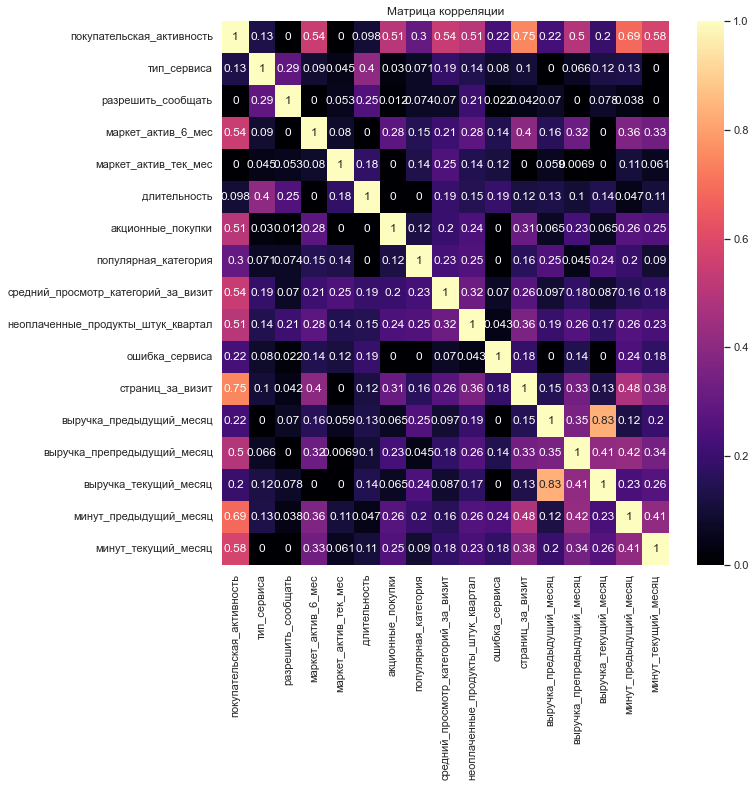

In [66]:
matrix_corr = market_full.drop('id', axis=1).phik_matrix()
plt.figure(figsize=(10, 10))
sns.heatmap(matrix_corr, annot=True, cmap='magma')
plt.title('Матрица корреляции')
plt.show()

Мультиколлинеарности не наблюдается. Следующие столбцы имеют корреляцию с целевым признаком "Покупательская_активность": 'маркет_актив_6_мес', 'акционные_покупки', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 'страниц_за_визит','выручка_препредыдущий_месяц', 'минут_предыдущий_месяц', 'минут_текущий_месяц'.

## Использование пайплайнов

Подготовим данные для построения моделей.

In [67]:
market_full['покупательская_активность'] = market_full['покупательская_активность'].apply(lambda x: 1 if x=='Снизилась' else 0) 

In [68]:
market_full['акционные_покупки_категория'] = market_full['акционные_покупки'].apply( 
    lambda x: 'Часто покупает по акции' if x>= 0.5 else 'Редко покупает по акции' )
market_full = market_full.drop(['акционные_покупки'], axis=1)
market_full = market_full.set_index('id')

In [69]:
RANDOM_STATE = 42
TEST_SIZE = 0.25

X = market_full.drop(['покупательская_активность'], axis=1)
y = market_full['покупательская_активность']
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=TEST_SIZE, 
                                                    random_state=RANDOM_STATE,
                                                    stratify=y
                                                   )

In [70]:
X_train.head(10)

,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц,акционные_покупки_категория
id,,,,,,,,,,,,,,,,
215858,стандарт,да,5.5,4,510,Мелкая бытовая техника и электроника,2,4,7,16,5170.5,4347.0,6014.2,20,6,Редко покупает по акции
215361,стандарт,да,5.1,4,199,Техника для красоты и здоровья,4,5,2,3,6400.0,4597.0,3789.7,11,13,Редко покупает по акции
215884,стандарт,да,4.3,5,997,Мелкая бытовая техника и электроника,5,1,3,11,4113.0,4626.0,3798.4,13,10,Редко покупает по акции
216564,стандарт,да,5.6,4,342,Кухонная посуда,2,7,5,8,4930.0,5269.0,4766.2,14,19,Часто покупает по акции
215715,премиум,да,3.6,5,873,Товары для детей,3,2,2,5,3716.0,4691.0,4600.0,10,10,Редко покупает по акции
216533,стандарт,нет,5.7,5,769,Техника для красоты и здоровья,4,1,8,10,5868.0,4925.0,5180.3,15,20,Редко покупает по акции
215674,стандарт,да,3.0,4,304,Домашний текстиль,1,6,5,3,4789.5,4305.0,4762.2,11,11,Редко покупает по акции
216334,премиум,да,6.1,3,1056,Домашний текстиль,2,3,7,8,4767.5,5315.0,4423.0,15,17,Редко покупает по акции
216186,стандарт,да,4.3,4,831,Мелкая бытовая техника и электроника,5,2,3,7,3872.0,4697.0,3287.0,11,17,Редко покупает по акции


In [71]:
ohe_columns = ['разрешить_сообщать', 'популярная_категория', 'тип_сервиса']
ord_columns = ['акционные_покупки_категория']
num_columns = ['маркет_актив_6_мес', 'маркет_актив_тек_мес', 
             'маркет_актив_тек_мес', 
             'длительность', 
             'средний_просмотр_категорий_за_визит',
             'неоплаченные_продукты_штук_квартал', 
             'ошибка_сервиса', 
             'страниц_за_визит', 
             'выручка_предыдущий_месяц', 
             'выручка_препредыдущий_месяц', 
             'выручка_текущий_месяц', 
             'минут_предыдущий_месяц', 
             'минут_текущий_месяц']

In [72]:
ohe_pipe = Pipeline(
    [
        ('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False))
    ]
)

In [73]:
ord_pipe = Pipeline(
    [
        (
            'simpleImputer_before_ord',
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ord',
            OrdinalEncoder(categories=[
                                      ['Редко покупает по акции','Часто покупает по акции']],
                          handle_unknown='use_encoded_value',
                          unknown_value=np.nan)
        ),
        (
            'simpleImputer_after_ord',
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ]
)

In [74]:
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)

In [75]:
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

In [76]:
param_grid = [
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 10),
        'models__max_features': range(2,10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2,10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },

    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(1,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    {
        'models': [SVC(random_state=RANDOM_STATE, kernel='poly')],
        'models__degree': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    }
]

In [77]:
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)
randomized_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore',
                                                                                                              sparse=False))]),
                                                                               ['разрешить_сообщать',
                                                                                'популярная_категория',
                                                                                'тип_сервиса']),
                                                                              ('ord',...
                                        {'models': [LogisticRegression(C=2,
                                                                       penalty='l1',
                                                                       random_state=42,
                                                                       solver='liblinear')],
                                         'models__C': range(1, 5),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [SVC(kernel='poly',
                                                        random_state=42)],
                                         'models__degree': range(2, 5),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']}],
                   random_state=42, scoring='roc_auc')

In [78]:
print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', round(randomized_search.best_score_, 2))

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['разрешить_сообщать',
                                                   'популярная_категория',
                                                   'тип_сервиса']),
                               

В нашем датасете один класс значительно преобладает над другим (Покупательская способность: "Снизилась" / "Осталась Прежней"), F1-score и ROC-AUC помогают учесть дисбаланс классов.

In [79]:
probabilities = randomized_search.predict_proba(X_test)[:, 1]
print('Площадь ROC-кривой:', roc_auc_score(y_test, probabilities))

Площадь ROC-кривой: 0.9176070865186263


In [80]:
y_test_pred = randomized_search.predict(X_test)
#print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_test_pred)}')

In [81]:
print(f'Метрика F1-score на тестовой выборке: {round(f1_score(y_test, y_test_pred, average="macro"), 2)}')

Метрика F1-score на тестовой выборке: 0.9


Лучшей моделью оказалась LogisticRegression с параметрами (C=2, penalty='l1', random_state=42, solver='liblinear'). Метрика лучшей модели на тренировочной выборке: 0.9. Площадь ROC-кривой составила 0.92. Метрика f1 показала 0.90 на тестовой выборке.

## Анализ важности признаков

In [82]:
X_train_shap = pipe_final.named_steps['preprocessor'].fit_transform(X_train)
explainer = shap.LinearExplainer(randomized_search.best_estimator_.named_steps['models'], X_train_shap)

In [83]:
X_test_shap = pipe_final.named_steps['preprocessor'].transform(X_train)

In [84]:
feature_names = ['ohe__разрешить_сообщать_нет',
       'ohe__популярная_категория_Косметика и аксесуары',
       'ohe__популярная_категория_Кухонная посуда',
       'ohe__популярная_категория_Мелкая бытовая техника и электроника',
       'ohe__популярная_категория_Техника для красоты и здоровья',
       'ohe__популярная_категория_Товары для детей',
       'ohe__тип_сервиса_стандарт', 'ord__акционные_покупки_категория',
       'num__маркет_актив_6_мес', 'num__маркет_актив_тек_мес',
       'num__маркет_актив_тек_мес', 'num__длительность',
       'num__средний_просмотр_категорий_за_визит',
       'num__неоплаченные_продукты_штук_квартал', 'num__ошибка_сервиса',
       'num__страниц_за_визит', 'num__выручка_предыдущий_месяц',
       'num__выручка_препредыдущий_месяц', 'num__выручка_текущий_месяц',
       'num__минут_предыдущий_месяц', 'num__минут_текущий_месяц']
               
feature_names = np.array(feature_names)

In [85]:
#feature_names = pipe_final.named_steps['preprocessor'].get_feature_name()
X_test_shap = pd.DataFrame(X_test_shap, columns=feature_names)
shap_values = explainer(X_test_shap)

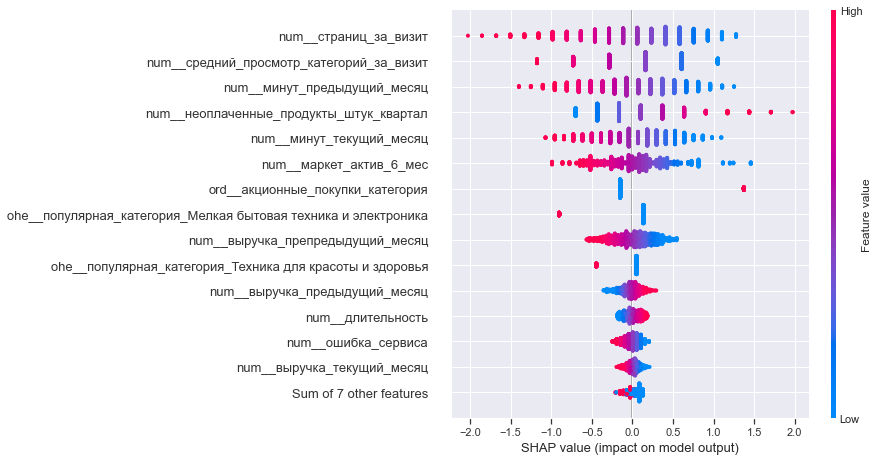

In [86]:
shap.plots.beeswarm(shap_values, max_display=15)

**Вывод:** получились следующие самые значимые признаки: Страниц_за_визит, Средний_просмотр_категорий_за_визит, мин_предыдущий_месяц, мин_текущий_месяц, неоплаченный_продукты_штук_квартал. Если рассмотреть эти признаки для  акционных покупок, то можно предположить, что пользователи отслеживают/проверяют, есть ли акция на тот или иной товар. Также это объясняет, почему в корзинах могут лежать неоплаченные товары. Эти данные подкрепляют вывод, сделанный в исследовательском анализе данных.

## Сегментация покупателей

Добавим столбец с вероятностью снижения покупательской активности и попробуем отследить взаимосвязь с прибылью.

In [87]:
y_test_proba = randomized_search.predict_proba(X_test)[:,1]
y_train_proba = randomized_search.predict_proba(X_train)[:,1]

In [88]:
y_train_proba

array([0.06767989, 0.64255419, 0.07174691, 0.69530801, 0.74661237,
       0.02002674, 0.9726795 , 0.14854995, 0.09463051, 0.0710592 ,
       0.07226848, 0.67752032, 0.89694176, 0.0410682 , 0.05750103,
       0.66281204, 0.02610856, 0.88240016, 0.3050143 , 0.19061791,
       0.05552019, 0.93745994, 0.44538527, 0.78832063, 0.23361814,
       0.72237073, 0.31872309, 0.49211137, 0.0898394 , 0.3513308 ,
       0.03192201, 0.02489067, 0.19647579, 0.25929799, 0.95882814,
       0.06705357, 0.46034067, 0.25872528, 0.40147534, 0.01463505,
       0.87540757, 0.2394789 , 0.40113564, 0.37194374, 0.36345456,
       0.98178578, 0.06371275, 0.2405714 , 0.14998163, 0.18246753,
       0.76554212, 0.3502847 , 0.2387223 , 0.74136544, 0.25011777,
       0.9506949 , 0.07561232, 0.13008945, 0.06243347, 0.02879074,
       0.9839581 , 0.03333449, 0.12956462, 0.97517323, 0.06553508,
       0.01440818, 0.0167669 , 0.81749623, 0.0074087 , 0.09805135,
       0.94353845, 0.89161734, 0.45473342, 0.96145973, 0.09753

In [89]:
X_test_copy = X_test.copy()
X_train_copy = X_train.copy()
X_test_copy['вероятность_снижения_активности'] = y_test_proba
X_train_copy['вероятность_снижения_активности'] = y_train_proba
full_copy = pd.concat([X_train_copy, X_test_copy])
money = money.set_index('id')
full_copy = full_copy.join(money)

In [90]:
full_copy

,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц,акционные_покупки_категория,вероятность_снижения_активности,прибыль
id,,,,,,,,,,,,,,,,,,
215858,стандарт,да,5.5,4,510,Мелкая бытовая техника и электроника,2,4,7,16,5170.5,4347.0,6014.2,20,6,Редко покупает по акции,0.067680,4.37
215361,стандарт,да,5.1,4,199,Техника для красоты и здоровья,4,5,2,3,6400.0,4597.0,3789.7,11,13,Редко покупает по акции,0.642554,4.03
215884,стандарт,да,4.3,5,997,Мелкая бытовая техника и электроника,5,1,3,11,4113.0,4626.0,3798.4,13,10,Редко покупает по акции,0.071747,4.37
216564,стандарт,да,5.6,4,342,Кухонная посуда,2,7,5,8,4930.0,5269.0,4766.2,14,19,Часто покупает по акции,0.695308,5.58
215715,премиум,да,3.6,5,873,Товары для детей,3,2,2,5,3716.0,4691.0,4600.0,10,10,Редко покупает по акции,0.746612,4.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215429,премиум,нет,0.9,4,690,Домашний текстиль,2,5,7,4,3662.0,4488.0,4158.6,11,10,Редко покупает по акции,0.966219,3.71
216233,премиум,да,3.9,4,1048,Техника для красоты и здоровья,3,0,6,14,4325.0,4553.0,4257.4,15,17,Редко покупает по акции,0.046961,4.62
215716,стандарт,да,2.4,4,952,Техника для красоты и здоровья,3,5,2,3,3067.0,4165.0,3343.9,13,14,Редко покупает по акции,0.867298,4.07


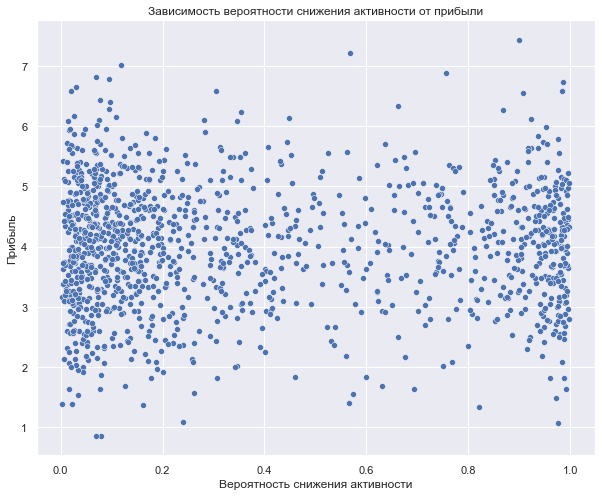

In [91]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(data=full_copy, y='прибыль', x='вероятность_снижения_активности', ax=ax)
ax.set_xlabel('Вероятность снижения активности')
ax.set_ylabel('Прибыль')
ax.set_title('Зависимость вероятности снижения активности от прибыли')
plt.show()

Корреляция между "Прибыль" и "Вероятность снижения активности" не заметна. Попробуем посмотреть  корреляцию "Вероятность снижения активности" с категориальными признаками.

In [92]:
def cat_scat(columns):
    for column in columns:
        fig, ax = plt.subplots(figsize=(10, 8))
        sns.scatterplot(data=full_copy, y='прибыль', x='вероятность_снижения_активности', hue=column, ax=ax)
        ax.set_xlabel('Вероятность снижения активности')
        ax.set_ylabel('Прибыль')
        ax.set_title(f'Зависимость вероятности снижения активности от прибыли (группировка по {column})')
        plt.show()

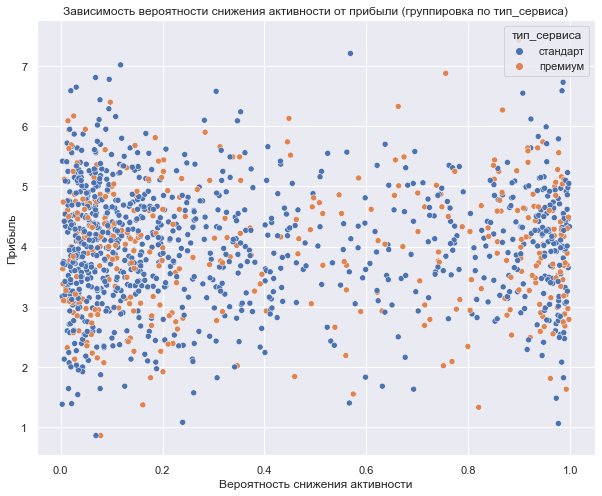

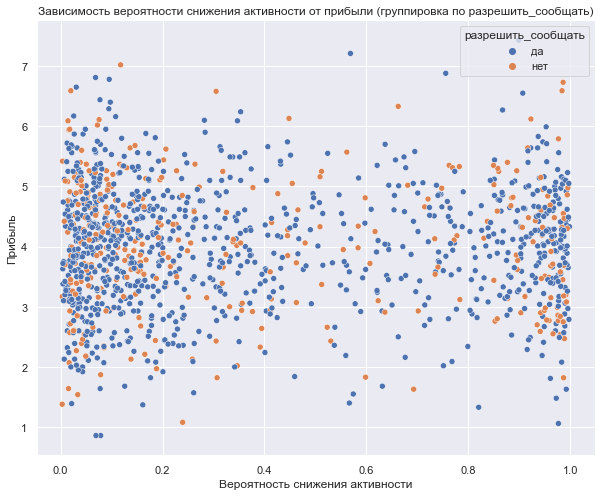

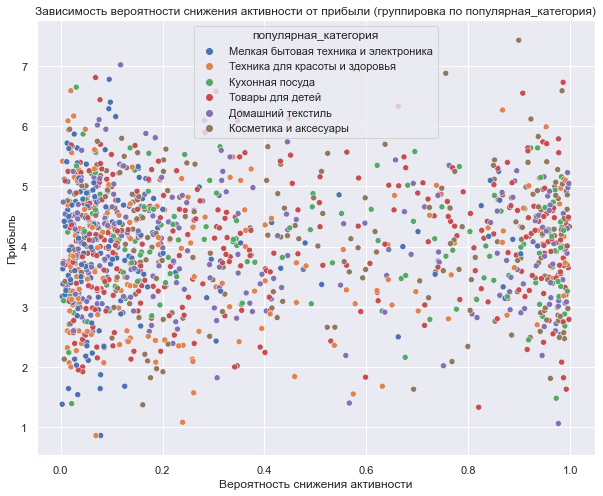

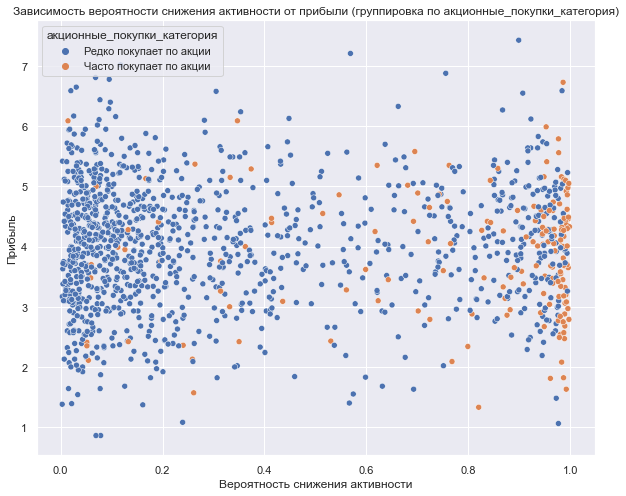

In [93]:
cat_columns = list(full_copy.select_dtypes(include='object').columns)
cat_scat(cat_columns)

Заметно, что пользователи, которые часто покупают по акции, больше склонны к снижению покупательской активности. Скорее всего,это связано с проведением акций, то есть эти пользователи ждут, когда ацкия появится на их желанный товар.

In [94]:
sharer = full_copy.copy()

In [95]:
sharer['анализ_влияния_акций'] = np.where(
     (sharer['вероятность_снижения_активности'] > 0.8) 
     & (sharer['акционные_покупки_категория']=='Часто покупает по акции'), 1, 0)
sharer[sharer['анализ_влияния_акций']==1]

,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц,акционные_покупки_категория,вероятность_снижения_активности,прибыль,анализ_влияния_акций
id,,,,,,,,,,,,,,,,,,,
215448,премиум,да,4.6,4,974,Домашний текстиль,4,3,3,7,5351.0,4670.0,6129.7,9,10,Часто покупает по акции,0.882400,2.95,1
215732,стандарт,нет,3.5,4,663,Косметика и аксесуары,3,6,4,3,5810.0,4955.0,5772.3,16,11,Часто покупает по акции,0.950695,3.51,1
215537,премиум,да,3.9,4,705,Косметика и аксесуары,3,3,7,4,6121.5,4974.0,6781.9,7,9,Часто покупает по акции,0.961460,1.81,1
215741,стандарт,да,4.8,4,563,Товары для детей,1,5,7,4,3960.0,4809.0,4594.4,10,14,Часто покупает по акции,0.956676,4.29,1
215408,премиум,да,2.4,3,666,Кухонная посуда,3,5,1,2,5295.0,4434.0,5029.8,10,12,Часто покупает по акции,0.989147,3.68,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215521,премиум,нет,1.5,3,541,Товары для детей,2,4,4,5,4045.0,4265.0,4650.8,11,13,Часто покупает по акции,0.981158,3.58,1
215701,стандарт,да,0.9,4,212,Домашний текстиль,2,5,4,2,4685.5,4444.0,5161.3,9,7,Часто покупает по акции,0.997708,5.05,1
215419,премиум,да,3.4,4,806,Домашний текстиль,3,5,8,6,5816.5,4756.0,5676.1,10,11,Часто покупает по акции,0.959305,4.60,1


In [96]:
sharer['популярная_категория'].value_counts()

Товары для детей                        329
Домашний текстиль                       250
Косметика и аксесуары                   223
Техника для красоты и здоровья          182
Мелкая бытовая техника и электроника    174
Кухонная посуда                         138
Name: популярная_категория, dtype: int64

Отсюда можно сделать вывод, что люди, которые в основном покупают по акции, чаще закупают товары для детей. Так как сейчас у этих пользователей идет снижение покупательской активности, можно предположить, что не было акций на лидирующие категории, то есть "Товары для детей", "Домашний текстиль ", "Косметика и аксесуары". Возможно, стоит провести акции на эти тоары в ближайшее время.

In [97]:
sharer['тип_сервиса'].value_counts()

стандарт    922
премиум     374
Name: тип_сервиса, dtype: int64

<AxesSubplot:xlabel='длительность', ylabel='Count'>

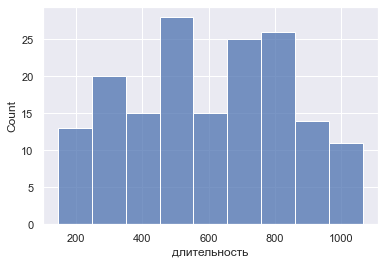

In [98]:
df_1 = sharer.loc[sharer['акционные_покупки_категория'] == 'Часто покупает по акции']['длительность']
df_2 = sharer.loc[sharer['акционные_покупки_категория'] == 'Часто покупает по акции']['выручка_текущий_месяц']
sns.histplot(df_1)

<AxesSubplot:xlabel='выручка_текущий_месяц', ylabel='Count'>

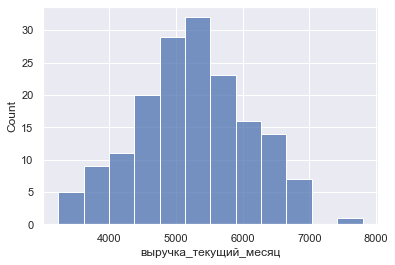

In [99]:
display(sns.histplot(df_2))

<AxesSubplot:xlabel='длительность', ylabel='Count'>

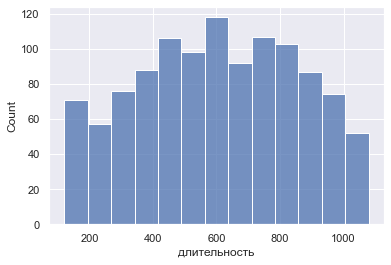

In [100]:
df_1 = sharer.loc[sharer['акционные_покупки_категория'] == 'Редко покупает по акции']['длительность']
df_2 = sharer.loc[sharer['акционные_покупки_категория'] == 'Редко покупает по акции']['выручка_текущий_месяц']
sns.histplot(df_1)

<AxesSubplot:xlabel='выручка_текущий_месяц', ylabel='Count'>

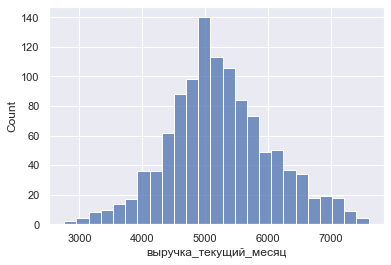

In [101]:
sns.histplot(df_2)

Хм, можно сделать вывод судя по графикам, что люди, которые часто покупают по акциям, приносят меньше денег компании, чем противоположная им сторона. Также люди, которые давно уже "пришли" в этот магазин, большинство редко покупает по акции, что очень необычно. Наша теория не подтвердилась. 

Отберем клиентов, которые редко покупают по акциям  и низкая вероятность снижения активности.

In [102]:
sharer_0 = sharer[sharer['анализ_влияния_акций']==0]
sharer_0

,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц,акционные_покупки_категория,вероятность_снижения_активности,прибыль,анализ_влияния_акций
id,,,,,,,,,,,,,,,,,,,
215858,стандарт,да,5.5,4,510,Мелкая бытовая техника и электроника,2,4,7,16,5170.5,4347.0,6014.2,20,6,Редко покупает по акции,0.067680,4.37,0
215361,стандарт,да,5.1,4,199,Техника для красоты и здоровья,4,5,2,3,6400.0,4597.0,3789.7,11,13,Редко покупает по акции,0.642554,4.03,0
215884,стандарт,да,4.3,5,997,Мелкая бытовая техника и электроника,5,1,3,11,4113.0,4626.0,3798.4,13,10,Редко покупает по акции,0.071747,4.37,0
216564,стандарт,да,5.6,4,342,Кухонная посуда,2,7,5,8,4930.0,5269.0,4766.2,14,19,Часто покупает по акции,0.695308,5.58,0
215715,премиум,да,3.6,5,873,Товары для детей,3,2,2,5,3716.0,4691.0,4600.0,10,10,Редко покупает по акции,0.746612,4.87,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216070,премиум,да,3.9,4,379,Мелкая бытовая техника и электроника,4,1,4,11,4010.5,4771.0,3481.4,19,21,Редко покупает по акции,0.010338,3.27,0
215429,премиум,нет,0.9,4,690,Домашний текстиль,2,5,7,4,3662.0,4488.0,4158.6,11,10,Редко покупает по акции,0.966219,3.71,0
216233,премиум,да,3.9,4,1048,Техника для красоты и здоровья,3,0,6,14,4325.0,4553.0,4257.4,15,17,Редко покупает по акции,0.046961,4.62,0


array([2, 4, 5, 3, 1, 6], dtype=int64)

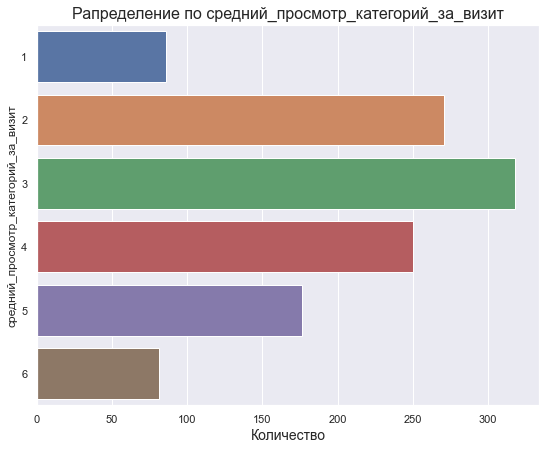

In [103]:
cat_plot(sharer_0, 'средний_просмотр_категорий_за_визит')  

array([16,  3, 11,  8,  5, 10,  7,  9,  4, 14,  6, 12, 15, 13,  2, 19,  1,
       18, 17, 20], dtype=int64)

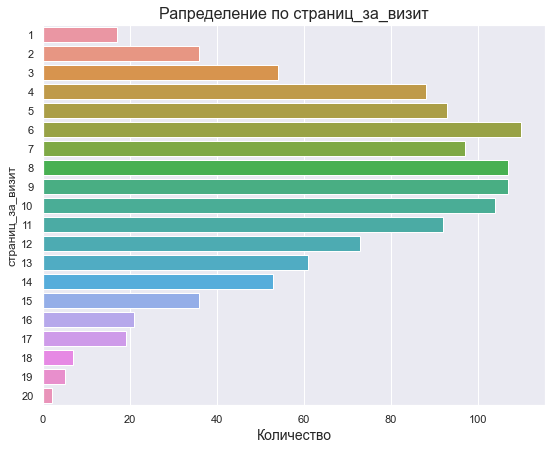

In [104]:
cat_plot(sharer_0, 'страниц_за_визит')

array([ 4,  5,  1,  7,  2,  6,  3,  0, 10,  8,  9], dtype=int64)

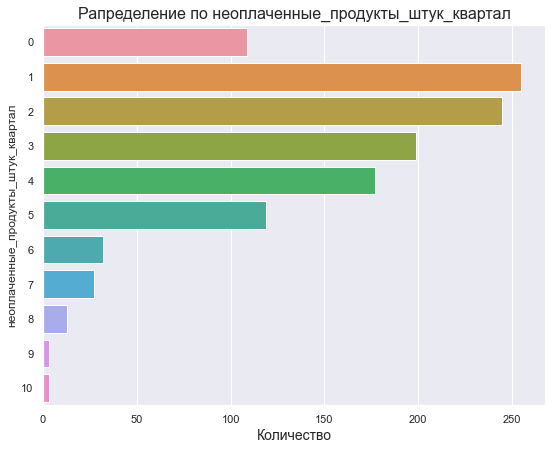

In [105]:
cat_plot(sharer_0, 'неоплаченные_продукты_штук_квартал')

array([20, 11, 13, 14, 10, 15,  8,  7, 12, 21, 17,  9, 16, 19, 18, 23, 22,
        6,  5], dtype=int64)

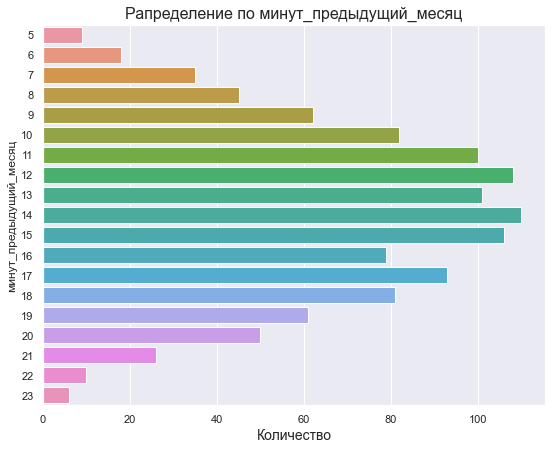

In [106]:
cat_plot(sharer_0, 'минут_предыдущий_месяц')

array([ 6, 13, 10, 19, 20, 11, 17, 14, 16, 12,  7, 15,  9, 18, 21,  8,  4,
       23, 22,  5], dtype=int64)

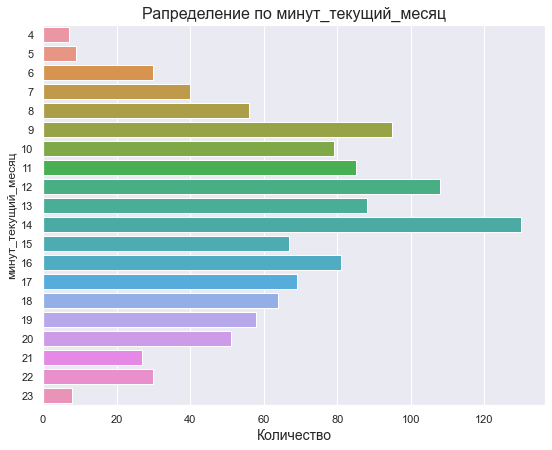

In [107]:
cat_plot(sharer_0, 'минут_текущий_месяц')

В среднем наши отобранные пользователи просматривают 3 категории за визит, страниц около 6-9, в корзине лежат около 1-3 товаров, проводили на сайте примерно 14 минут.
Портрет несильно отличается от портрета пользователя, составленного на основе целого датасета.

<AxesSubplot:xlabel='маркет_актив_6_мес', ylabel='Count'>

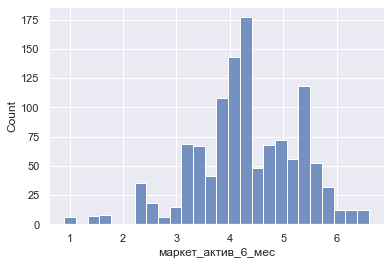

In [108]:
sns.histplot(sharer_0['маркет_актив_6_мес'])

<AxesSubplot:xlabel='маркет_актив_тек_мес', ylabel='Count'>

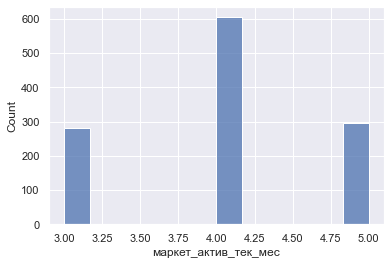

In [109]:
sns.histplot(sharer_0['маркет_актив_тек_мес'])

In [110]:
sharer_0[(sharer_0['маркет_актив_тек_мес'] == 4)]['популярная_категория'].value_counts()

Товары для детей                        148
Домашний текстиль                       116
Мелкая бытовая техника и электроника     98
Косметика и аксесуары                    98
Техника для красоты и здоровья           87
Кухонная посуда                          58
Name: популярная_категория, dtype: int64

Вот и одно отличие: здесь третье место делят пополам две категории "Мелкая бытовая техника и электроника" и "Косметика и аксесуары".

**Вывод:** таким образом, можно сделать вывод, что стоит ориентироваться на сформированную клиентскую базу, которые уже давно примкнула к этому магазину. Мы заметили, что акции несильно влияют на выручку. Можно увеличить ассортимент товаров для детей, домашний текстиль, мелкая бытовая техника и электроника, косметика и аксесуары. Также рекомендую составить персональные предложение для клиентской базы. Возможно, еще открыть категорию товаров.

## Общий вывод

Целью данного исследования было решение двух задач:

1. Построение модели предсказания снижения покупательской активности пользователей. 
2. Исследование выбранного сегмента пользователей.

Для достижения этих целей был проведен ряд шагов:

1. Загрузка данных: для работы были предоставлены 4 датасеты: market_file.csv, market_money.csv, market_time.csv, money.csv. Мы загрузили их, просмотрели основную информацию.

2. Предобработка данных: Были проведены следующие действия:

* Стандартизация названий признаков: пробелы в именах столбцов были заменены на подчеркивания и приведены к змеиному регистру названия столбцов.
* Обработка дубликатов: в датасете market_file было обнаружено 11 дубликатов (исключая столбец с уникальным идентификатором). Было принято решение оставить дубликаты.
* Обработка пропущенных значений: пропущенных значений в данных не было обнаружено.
3. Исследовательский анализ данных. мы  построили графики, проанализировали их, нашли и избавились от аномалий, исправили опечатки. В конце отобрали пользователей с активностью не менее трех месяцев для дальнейшей работы.
4. Объеденение таблиц. мы объединили датасеты market_file.csv, market_money.csv, market_time.csv.
5. Корреляционный анализ данных. 
Мультиколлинеарности не наблюдается. Следующие столбцы имеют корреляцию с целевым признаком "Покупательская_активность": 'маркет_актив6мес', 'акционные_покупки', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 'страниц_за_визит','выручка_препредыдущий_месяц', 'минут_предыдущий_месяц', 'минут_текущий_месяц'.
6. Обучение модели. 
С использованием пайпланов из библиотеки sklearn были обучены модели KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() и SVC(). При обучении моделей средстави пайплана перебирались некоторое количество гиперпараметров моделей с целью нахождения модели, которая даст лучший результат. Обучение модели. Лучшей моделью оказалась LogisticRegression с параметрами (C=2, penalty='l1', random_state=42, solver='liblinear'). Метрика лучшей модели на тренировочной выборке: 0.9. Площадь ROC-кривой составила 0.92. Метрика f1 показала 0.90 на тестовой выборке.
7. Анализ важности признаков. 
Мы обнаружили, что следующие признаки самые значимые: Страниц_за_визит, Средний_просмотр_категорий_за_визит, мин_предыдущий_месяц, мин_текущий_месяц, неоплаченный_продукты_штук_квартал.
8. Сегментация пользователей.
Для анализа пользователей был выбран сегмент пользователей часто покупающих по скидке и в то же время имеющийх высокую вероятность снижения покупательской активности. Наша теория не подтвердилась:  Люди, которые часто покупают по акциям, приносят меньше денег компании, чем противоположная им сторона. Также люди, которые давно уже "пришли" в этот магазин, большинство редко покупает по акции, что очень необычно. 

Таким образом, можно сделать вывод, что стоит ориентироваться на сформированную клиентскую базу, которые уже давно примкнула к этому магазину. Мы заметили, что акции несильно влияют на выручку. Можно увеличить ассортимент товаров для детей, домашний текстиль, мелкая бытовая техника и электроника, косметика и аксесуары. Также рекомендую составить персональные предложение для клиентской базы. Возможно, стоит открыть еще категорию товаров, чтобы повысить прибыль компании. 